In [349]:
#library(ggplot2)
#options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [350]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = F)

Mostrar las primeras 6 filas del dataframe

In [351]:
airbnb[1:6,]

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [352]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
names(airbnb)<-newnames
names(airbnb)

[1] "CodigoPostal"   "Barrio"         "TipoPropiedad"  "TipoAlquiler"  
 [5] "MaxOcupantes"   "NumBanyos"      "NumDormitorios" "NumCamas"      
 [9] "TipoCama"       "Comodidades"    "PiesCuadrados"  "Precio"        
[13] "Puntuacion"

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [353]:
airbnb$metrosCuadrados <-airbnb$PiesCuadrados * 0.092903
airbnb$metrosCuadrados[1:20]

[1]       NA       NA       NA       NA 49.98181       NA       NA       NA
 [9] 65.03210       NA  3.71612       NA       NA       NA 60.01534       NA
[17]       NA       NA       NA       NA

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [354]:
airbnb$CodigoPostal

[1] "28004"        "28004"        "28004"        "28004"       
    [5] "28015"        "28004"        "28004"        "28004"       
    [9] "28015"        "28004"        "28004"        "28004"       
   [13] "28013"        "28005"        "28013"        "28013"       
   [17] "28013"        "28012"        "28013"        "28013"       
   [21] "28013"        "28005"        "28013"        "28012"       
   [25] "28012"        "28013"        "28014"        "28013"       
   [29] "28012"        "28005"        "28005"        "28005"       
   [33] "28005"        "28012"        "28005"        "28005"       
   [37] "28045"        "28005"        "28005"        "28005"       
   [41] "28005"        "28005"        "28013"        "28013"       
   [45] "28013"        "28013"        "28013"        "28012"       
   [49] "28013"        "28012"        "28013"        "28013"       
   [53] "28013"        "28012"        "28013"        "28013"       
   [57] "28012"        "27013"        ""             "28045"       
   [61] "28045"        "28045"        "28045"        "28045"       
   [65] "28045"        "28045"        "28045"        "28045"       
   [69] "28045"        "28045"        "28045"        "28012"       
   [73] "28045"        "28045"        "28045"        "28045"       
   [77] "28012"        "28012"        "28012"        "28012"       
   [81] "28005"        "28012"        ""             "28005"       
   [85] "28012"        "28012"        "28012"        "28012"       
   [89] "28012"        "28005"        "28012"        "28005"       
   [93] "28005"        "28012"        "28005"        "28012"       
   [97] "28012"        "28005"        "28005"        "28005"       
  [101] "28012"        "28012"        "28005"        "28012"       
  [105] "28014"        "28014"        "28014"        "28014"       
  [109] "28012"        "28014"        "28014"        "28014"       
  [113] "28012"        "28014"        "28014"        "28014"       
  [117] "28014"        "28014"        "28012"        "28012"       
  [121] "28014"        "28012"        "28012"        "28005"       
  [125] "28012"        "28012"        "28012"        "28012"       
  [129] "28012"        "28005"        "28005"        ""            
  [133] "28012"        ""             "28012"        "28012"       
  [137] "28012"        "28005"        "28012"        "28012"       
  [141] "28014"        "28014"        "28045"        "28045"       
  [145] "28045"        "28045"        "28007"        "28007"       
  [149] "28007"        "28007"        "28007"        "28007"       
  [153] "28028"        "28009"        "28009"        "28009"       
  [157] "28009"        "28014"        "28014"        "28007"       
  [161] "28005"        "28013"        "28005"        "28005"       
  [165] "28013"        "28013"        "28013"        "28005"       
  [169] "28013"        "28013"        "28005"        "28005"       
  [173] "28005"        "28013"        "28013"        "28013"       
  [177] "28005"        "28013"        "28005"        "28013"       
  [181] "28013"        "28005"        "28013"        "28005"       
  [185] "28013"        "28013"        "28005"        "28005"       
  [189] "28013"        "28013"        "28005"        "28013"       
  [193] "28005"        "28013"        "28005"        "28013"       
  [197] "28005"        "28005"        "28005"        "28005"       
  [201] "28005"        "28013"        "28005"        "28005"       
  [205] "28005"        "28013"        "28013"        "28012"       
  [209] "28005"        "28012"        "28005"        "28012"       
  [213] "28005"        "28012"        "28012"        "28005"       
  [217] "28012"        "28005"        "28012"        "28012"       
  [221] "28012"        "28012"        "28012"        "28012"       
  [225] "28012"        "28012"        "28012"        "28013"       
  [229] "28013"        "28014"        "28012"        "28012"       
  [233] "28012"        "28005"        "28005"        "28005"

In [355]:
airbnb$CodigoPostal[airbnb$CodigoPostal == "2804"]<- '28004'

In [356]:
airbnb$CodigoPostal

[1] "28004"        "28004"        "28004"        "28004"       
    [5] "28015"        "28004"        "28004"        "28004"       
    [9] "28015"        "28004"        "28004"        "28004"       
   [13] "28013"        "28005"        "28013"        "28013"       
   [17] "28013"        "28012"        "28013"        "28013"       
   [21] "28013"        "28005"        "28013"        "28012"       
   [25] "28012"        "28013"        "28014"        "28013"       
   [29] "28012"        "28005"        "28005"        "28005"       
   [33] "28005"        "28012"        "28005"        "28005"       
   [37] "28045"        "28005"        "28005"        "28005"       
   [41] "28005"        "28005"        "28013"        "28013"       
   [45] "28013"        "28013"        "28013"        "28012"       
   [49] "28013"        "28012"        "28013"        "28013"       
   [53] "28013"        "28012"        "28013"        "28013"       
   [57] "28012"        "27013"        ""             "28045"       
   [61] "28045"        "28045"        "28045"        "28045"       
   [65] "28045"        "28045"        "28045"        "28045"       
   [69] "28045"        "28045"        "28045"        "28012"       
   [73] "28045"        "28045"        "28045"        "28045"       
   [77] "28012"        "28012"        "28012"        "28012"       
   [81] "28005"        "28012"        ""             "28005"       
   [85] "28012"        "28012"        "28012"        "28012"       
   [89] "28012"        "28005"        "28012"        "28005"       
   [93] "28005"        "28012"        "28005"        "28012"       
   [97] "28012"        "28005"        "28005"        "28005"       
  [101] "28012"        "28012"        "28005"        "28012"       
  [105] "28014"        "28014"        "28014"        "28014"       
  [109] "28012"        "28014"        "28014"        "28014"       
  [113] "28012"        "28014"        "28014"        "28014"       
  [117] "28014"        "28014"        "28012"        "28012"       
  [121] "28014"        "28012"        "28012"        "28005"       
  [125] "28012"        "28012"        "28012"        "28012"       
  [129] "28012"        "28005"        "28005"        ""            
  [133] "28012"        ""             "28012"        "28012"       
  [137] "28012"        "28005"        "28012"        "28012"       
  [141] "28014"        "28014"        "28045"        "28045"       
  [145] "28045"        "28045"        "28007"        "28007"       
  [149] "28007"        "28007"        "28007"        "28007"       
  [153] "28028"        "28009"        "28009"        "28009"       
  [157] "28009"        "28014"        "28014"        "28007"       
  [161] "28005"        "28013"        "28005"        "28005"       
  [165] "28013"        "28013"        "28013"        "28005"       
  [169] "28013"        "28013"        "28005"        "28005"       
  [173] "28005"        "28013"        "28013"        "28013"       
  [177] "28005"        "28013"        "28005"        "28013"       
  [181] "28013"        "28005"        "28013"        "28005"       
  [185] "28013"        "28013"        "28005"        "28005"       
  [189] "28013"        "28013"        "28005"        "28013"       
  [193] "28005"        "28013"        "28005"        "28013"       
  [197] "28005"        "28005"        "28005"        "28005"       
  [201] "28005"        "28013"        "28005"        "28005"       
  [205] "28005"        "28013"        "28013"        "28012"       
  [209] "28005"        "28012"        "28005"        "28012"       
  [213] "28005"        "28012"        "28012"        "28005"       
  [217] "28012"        "28005"        "28012"        "28012"       
  [221] "28012"        "28012"        "28012"        "28012"       
  [225] "28012"        "28012"        "28012"        "28013"       
  [229] "28013"        "28014"        "28012"        "28012"       
  [233] "28012"        "28005"        "28005"        "28005"

In [357]:
airbnb$CodigoPostal[airbnb$CodigoPostal == "2805"]<- '28005'

In [358]:
airbnb$CodigoPostal[airbnb$CodigoPostal == "2815"]<- '28015'

In [359]:
airbnb$CodigoPostal[airbnb$CodigoPostal == '28051
28051'] <- '28051'


In [360]:
airbnb$CodigoPostal[airbnb$CodigoPostal == '28002
28002'] <- '28002'

In [361]:
airbnb$CodigoPostal[airbnb$CodigoPostal == 'Madrid 28004'] <- '28004'

In [362]:
airbnb$CodigoPostal[airbnb$CodigoPostal == '28'] <- NA

In [363]:
airbnb$CodigoPostal[airbnb$CodigoPostal == '2015'] <- NA

In [364]:
airbnb$CodigoPostal[airbnb$CodigoPostal == '25008'] <- NA

In [365]:
airbnb$CodigoPostal[airbnb$CodigoPostal == '27004'] <- NA

In [366]:
airbnb$CodigoPostal[airbnb$CodigoPostal == '20013'] <- NA

In [367]:
airbnb$CodigoPostal[airbnb$CodigoPostal == '280013'] <- '28013'

In [368]:
airbnb$CodigoPostal[airbnb$CodigoPostal=='' | airbnb$CodigoPostal=='-' | airbnb$CodigoPostal=='28']<-NA
airbnb$CodigoPostal[!grepl("^28",airbnb$CodigoPostal)]<-NA

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [369]:
?as.data.frame

as.data.frame {base},R Documentation
x,any R object.
row.names,NULL or a character vector giving the row names for the data frame. Missing values are not allowed.
optional,"logical. If TRUE, setting row names and converting column names (to syntactic names: see make.names) is optional. Note that all of R's base package as.data.frame() methods use optional only for column names treatment, basically with the meaning of data.frame(*, check.names = !optional). See also the make.names argument of the matrix method."
...,additional arguments to be passed to or from methods.
stringsAsFactors,logical: should the character vector be converted to a factor?
cut.names,"logical or integer; indicating if column names with more than 256 (or cut.names if that is numeric) characters should be shortened (and the last 6 characters replaced by "" ..."")."
col.names,(optional) character vector of column names.
fix.empty.names,"logical indicating if empty column names, i.e., """" should be fixed up (in data.frame) or not."
check.names,logical; passed to the data.frame() call.
make.names,"a logical, i.e., one of FALSE, NA, TRUE, indicating what should happen if the row names (of the matrix x) are invalid. If they are invalid, the default, TRUE, calls make.names(*, unique=TRUE); make.names=NA will use “automatic” row names and a FALSE value will signal an error for invalid row names."


In [370]:
airbnb$CodigoPostal<- as.factor(airbnb$CodigoPostal)
airbnb$Barrio<- as.factor(airbnb$Barrio)
airbnb$TipoPropiedad<- as.factor(airbnb$TipoPropiedad)
airbnb$TipoAlquiler<- as.factor(airbnb$TipoAlquiler)
airbnb$TipoCama<- as.factor(airbnb$TipoCama)

In [371]:
str(airbnb)

'data.frame':	13207 obs. of  14 variables:
 $ CodigoPostal   : Factor w/ 61 levels "28001","28002",..: 4 4 4 4 15 4 4 4 15 4 ...
 $ Barrio         : Factor w/ 125 levels "Abrantes","Acacias",..: 115 115 115 115 115 115 115 115 115 115 ...
 $ TipoPropiedad  : Factor w/ 22 levels "Apartment","Bed & Breakfast",..: 1 1 1 16 1 1 15 1 1 1 ...
 $ TipoAlquiler   : Factor w/ 3 levels "Entire home/apt",..: 2 1 1 1 1 1 2 1 1 1 ...
 $ MaxOcupantes   : int  2 6 3 3 5 2 7 3 2 4 ...
 $ NumBanyos      : num  2 1 1 2 1 1 5 1 1 2 ...
 $ NumDormitorios : int  1 3 2 1 1 0 1 1 1 2 ...
 $ NumCamas       : int  1 5 2 1 1 1 7 NA 1 2 ...
 $ TipoCama       : Factor w/ 5 levels "Airbed","Couch",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Comodidades    : chr  "TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable "| __truncated__ "TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Drye"| __truncated__ "TV,Internet

In [372]:
unique(airbnb$CodigoPostal)

[1] 28004 28015 28013 28005 28012 28014 28045 <NA>  28007 28028 28009 28001
[13] 28006 28010 28002 28034 28050 28008 28011 28049 28038 28053 28047 28025
[25] 28019 28024 28016 28036 28046 28039 28020 28003 28029 28054 28041 28026
[37] 28058 28018 28030 28017 28027 28043 28033 28055 28021 28032 28037 28022
[49] 28042 28094 28035 28040 28031 28044 28105 28023 28051 28850 28048 28056
[61] 28060 28052
61 Levels: 28001 28002 28003 28004 28005 28006 28007 28008 28009 ... 28850

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [373]:
sort(table(airbnb$CodigoPostal), decreasing=T)[1:5]


28012 28004 28005 28013 28014 
 2060  1796  1195  1020   630 

In [374]:
sort(table(airbnb$CodigoPostal), decreasing=F)[1:5]


28048 28052 28056 28058 28060 
    1     1     1     1     1 

In [375]:
table(airbnb$CodigoPostal)


28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012 28013 
  231   171   185  1796  1195   218   206   338   216   384   250  2060  1020 
28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024 28025 28026 
  630   601    76   107    43   200   192    58    30    23    44   123    93 
28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 28037 28038 28039 
  122   263   110    73    27    33    89    45    59    67    65    77   160 
28040 28041 28042 28043 28044 28045 28046 28047 28048 28049 28050 28051 28052 
   16    63    90   103    19   495    32    67     1     3    58    17     1 
28053 28054 28055 28056 28058 28060 28094 28105 28850 
   85    12    12     1     1     1     1     1     1 

¿Cuales son los barrios que hay en el código postal 28012?

In [376]:
unique(airbnb[airbnb$CodigoPostal == '28012',1:2])

,CodigoPostal,Barrio
,<fct>,<fct>
18,28012,Sol
34,28012,Acacias
NA,NA,NA
72,28012,Palos de Moguer
77,28012,Embajadores
104,28012,Cortes
987,28012,Palacio
1716,28012,Universidad
5075,28012,Delicias


¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [377]:
cp_28012<-airbnb[which(airbnb$CodigoPostal=='28012'),1:2]
cp_28012$Barrio<-factor(cp_28012$Barrio)
table(cp_28012$Barrio)


        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4 

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [378]:
length(unique(airbnb$Barrio))
unique(airbnb$Barrio)

[1] 125

[1] Universidad                  Sol                         
  [3] Imperial                     Acacias                     
  [5] Chopera                      Delicias                    
  [7] Palos de Moguer              Embajadores                 
  [9] Cortes                       Atocha                      
 [11] Pacífico                     Adelfas                     
 [13] Estrella                     Ibiza                       
 [15] Jerónimos                    Niño Jesús                  
 [17] Palacio                      Justicia                    
 [19] Recoletos                    Goya                        
 [21] Fuente del Berro             Arapiles                    
 [23] Trafalgar                    Almagro                     
 [25] Guindalera                   Lista                       
 [27] Castellana                   El Viso                     
 [29] Prosperidad                  Valverde                    
 [31] Casa de Campo                El Goloso                   
 [33] Numancia                     Cármenes                    
 [35] Puerta del Angel             Lucero                      
 [37] Aluche                       San Isidro                  
 [39] Campamento                   Comillas                    
 [41] Opañel                       Vista Alegre                
 [43] Ciudad Jardín                Hispanoamérica              
 [45] Nueva España                 Castilla                    
 [47] Bellas Vistas                Cuatro Caminos              
 [49] Castillejos                  Vallehermoso                
 [51] Almenara                     Valdeacederas               
 [53] Berruguete                   Gaztambide                  
 [55] Rios Rosas                   Peñagrande                  
 [57] Argüelles                    Puerta Bonita               
 [59] Buenavista                   Abrantes                    
 [61] Orcasur                      San Fermín                  
 [63] Almendrales                  Pradolongo                  
 [65] Portazgo                     Entrevías                   
 [67] San Diego                    Palomeras Bajas             
 [69] Fontarrón                    Vinateros                   
 [71] Ventas                       Pueblo Nuevo                
 [73] Quintana                     Concepción                  
 [75] San Juan Bautista            Costillares                 
 [77] Piovera                      Canillas                    
 [79] Pinar del Rey                Apostol Santiago            
 [81] San Andrés                   Valdefuentes                
 [83] Butarque                     Los Angeles                 
 [85] Casco Histórico de Vicálvaro Simancas                    
 [87] Rejas                        Salvador                    
 [89] Casco Histórico de Barajas   Pilar                       
 [91] La Paz                       Mirasierra                  
 [93] Ciudad Universitaria         Moscardó                    
 [95] Palomeras Sureste            Marroquina                  
 [97] Media Legua                  Los Rosales                 
 [99] Casco Histórico de Vallecas  Timón                       
[101] Corralejos                   Cuatro Vientos              
[103] Colina                       San Cristobal               
[105] Alameda de Osuna             Aeropuerto                  
[107] Palomas                      Zofío                       
[109] Aguilas                      Legazpi                     
[111] Fuentelareina                Aravaca                     
[113] Ambroz                       Canillejas                  
[115] Valdezarza                   Amposta                     
[117] San Pascual                  Santa Eugenia               
[119] Arcos                        Rosas                       
[121] Valdemarín                   El Plantío                  
[123] Hellín                       Pavones                     
[125] Orcasitas                   

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [379]:
sort(table(airbnb$Barrio), decreasing=T)[1:5]


Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [380]:
length(unique(airbnb$TipoAlquiler))

[1] 3

In [381]:
unique(airbnb$TipoAlquiler)

[1] Private room    Entire home/apt Shared room    
Levels: Entire home/apt Private room Shared room

In [382]:
table(airbnb$TipoAlquiler)


Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

In [383]:
library("ggplot2")
options(repr.plot.height=6,repr.plot.width=8 , repr.plot.res = 200)

Warning message:
“Removed 9 rows containing non-finite values (`stat_boxplot()`).”


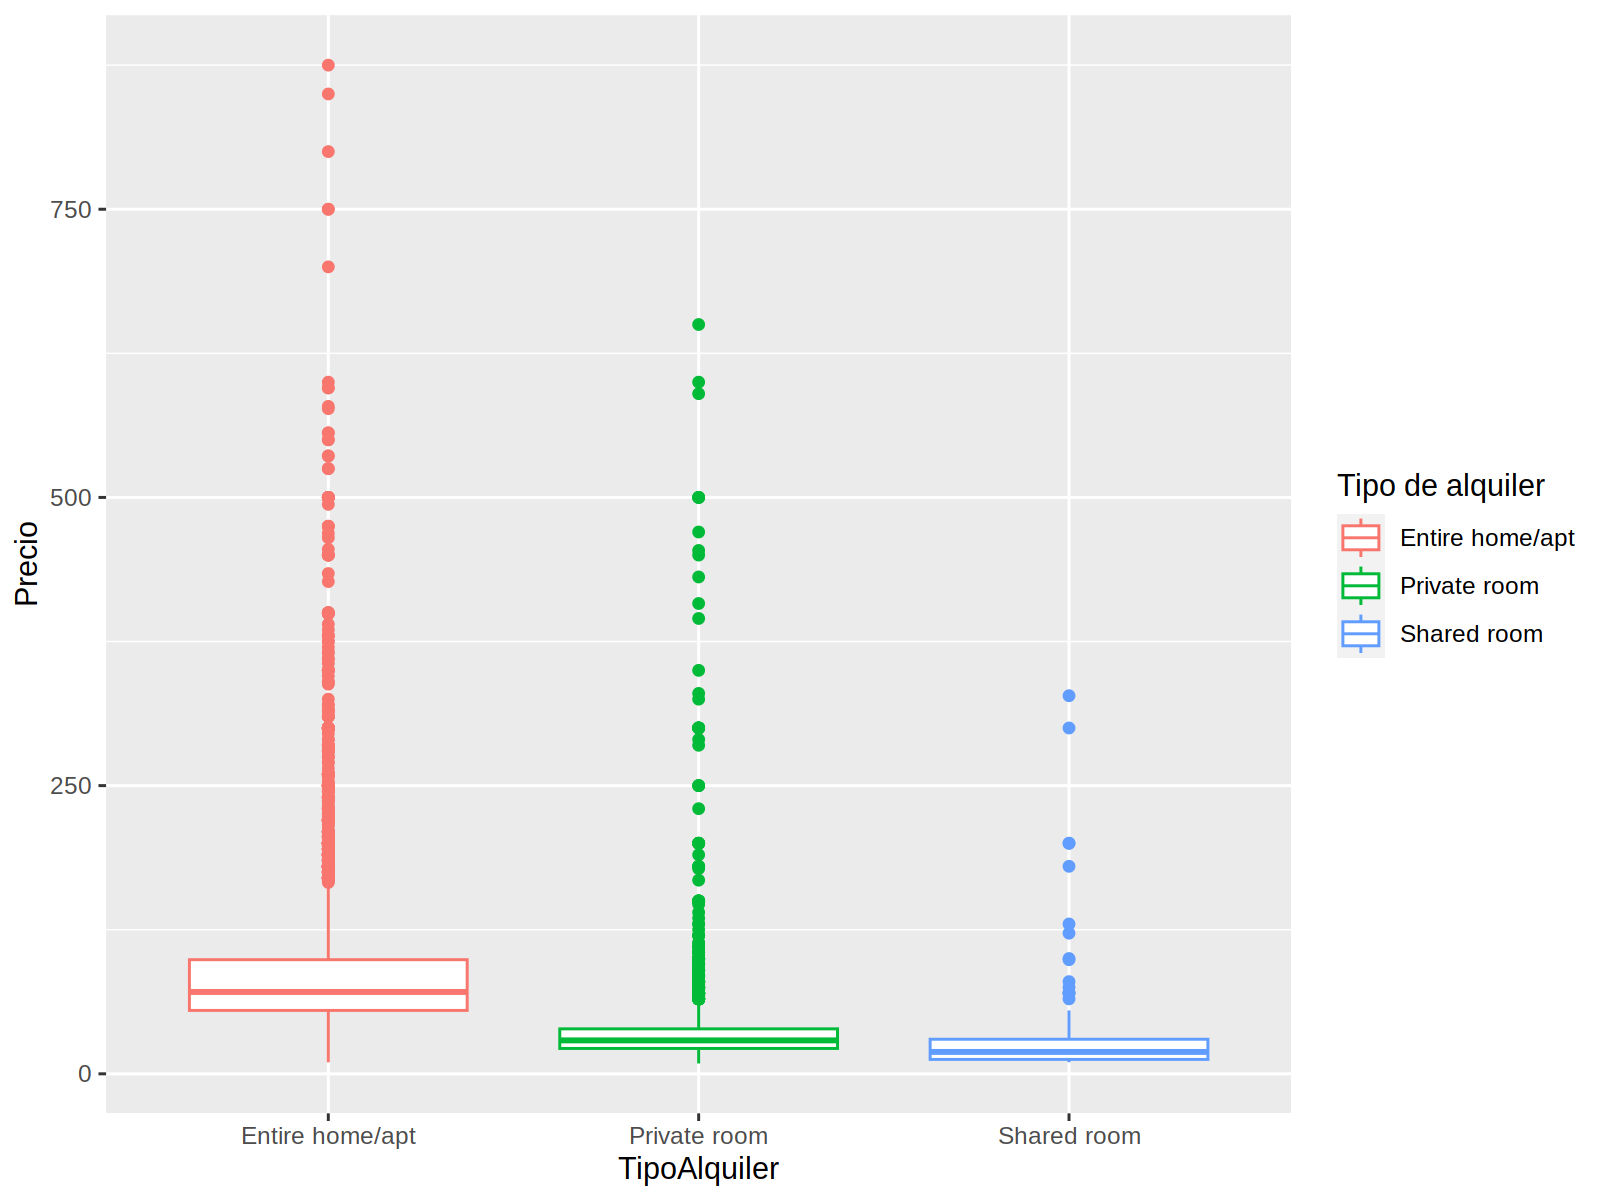

In [384]:
ggplot(data=airbnb,aes(x=TipoAlquiler, y=Precio, color=TipoAlquiler))+
 geom_boxplot()+
 scale_color_discrete(name="Tipo de alquiler")

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [385]:
for (tipo in levels(airbnb$TipoAlquiler)){
    df<-subset(airbnb,TipoAlquiler==tipo)
    print(paste("Precio medio tipo",tipo," = ",mean(df$Precio,na.rm=T)))
    if (nrow(df)>5000){
        df<-df[1:5000,]
    }
    sp<-shapiro.test(df$Precio)
    print(paste(" - Test shapiro pvalor = ",sp$p.value))
}

#Como no sigue una gaussiana realizamos un test de kruskal
kt<-kruskal.test(Precio~TipoAlquiler,airbnb)

paste("Las medias son estadísticamente diferentes ya que el pvalor es muy bajo. pvalor=",kt$p.value)

[1] "Precio medio tipo Entire home/apt  =  87.2966058763931"
[1] " - Test shapiro pvalor =  1.24077898621874e-72"
[1] "Precio medio tipo Private room  =  34.255135981217"
[1] " - Test shapiro pvalor =  9.18974842339072e-85"
[1] "Precio medio tipo Shared room  =  29.8534031413613"
[1] " - Test shapiro pvalor =  4.51672121600842e-24"


[1] "Las medias son estadísticamente diferentes ya que el pvalor es muy bajo. pvalor= 0"

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [386]:
airbnb_entire <- airbnb[airbnb$TipoAlquiler == 'Entire home/apt',]

In [387]:
airbnb_entire[1:5,]

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,metrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<chr>,<int>,<int>,<int>,<dbl>
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [388]:
sort(table(airbnb_entire$Barrio), decreasing=T)[1:5]


Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [389]:
meanprice <- aggregate(airbnb_entire$Precio, list(Barrio = airbnb_entire$Barrio),mean, na.rm=T)
colnames(meanprice) <- c("Barrio", "Mean")
meanprice5 <- head(meanprice[order(meanprice$Mean, decreasing = T),],5)
meanprice5


,Barrio,Mean
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [390]:
countprice <- aggregate( airbnb_entire$Barrio, by = list(airbnb_entire$Barrio), FUN = length)
colnames(countprice) <- c("Barrio", "Count")
df_merged <- merge(meanprice, countprice, by = 'Barrio')
df_merged

Barrio,Mean,Count
<fct>,<dbl>,<int>
Abrantes,46.00000,3
Acacias,68.16393,61
Adelfas,68.72727,33
Aeropuerto,38.00000,2
Aguilas,54.50000,2
Alameda de Osuna,138.75000,4
Almagro,109.18557,97
Almenara,65.68000,25
Almendrales,77.50000,18


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [391]:
df_merged <- df_merged[df_merged$Count > 100,]
df_5barrios <- head(df_merged[order(df_merged$Mean, decreasing = T),],5)
df_5barrios

,Barrio,Mean,Count
,<fct>,<dbl>,<int>
93,Recoletos,161.92537,135
52,Goya,111.33803,142
106,Sol,100.75036,701
108,Trafalgar,98.57848,223
59,Justicia,98.25468,534


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

In [392]:
#install.packages("gridExtra")

In [393]:
library(gridExtra)

Warning message:
“Removed 1 rows containing non-finite values (`stat_density()`).”


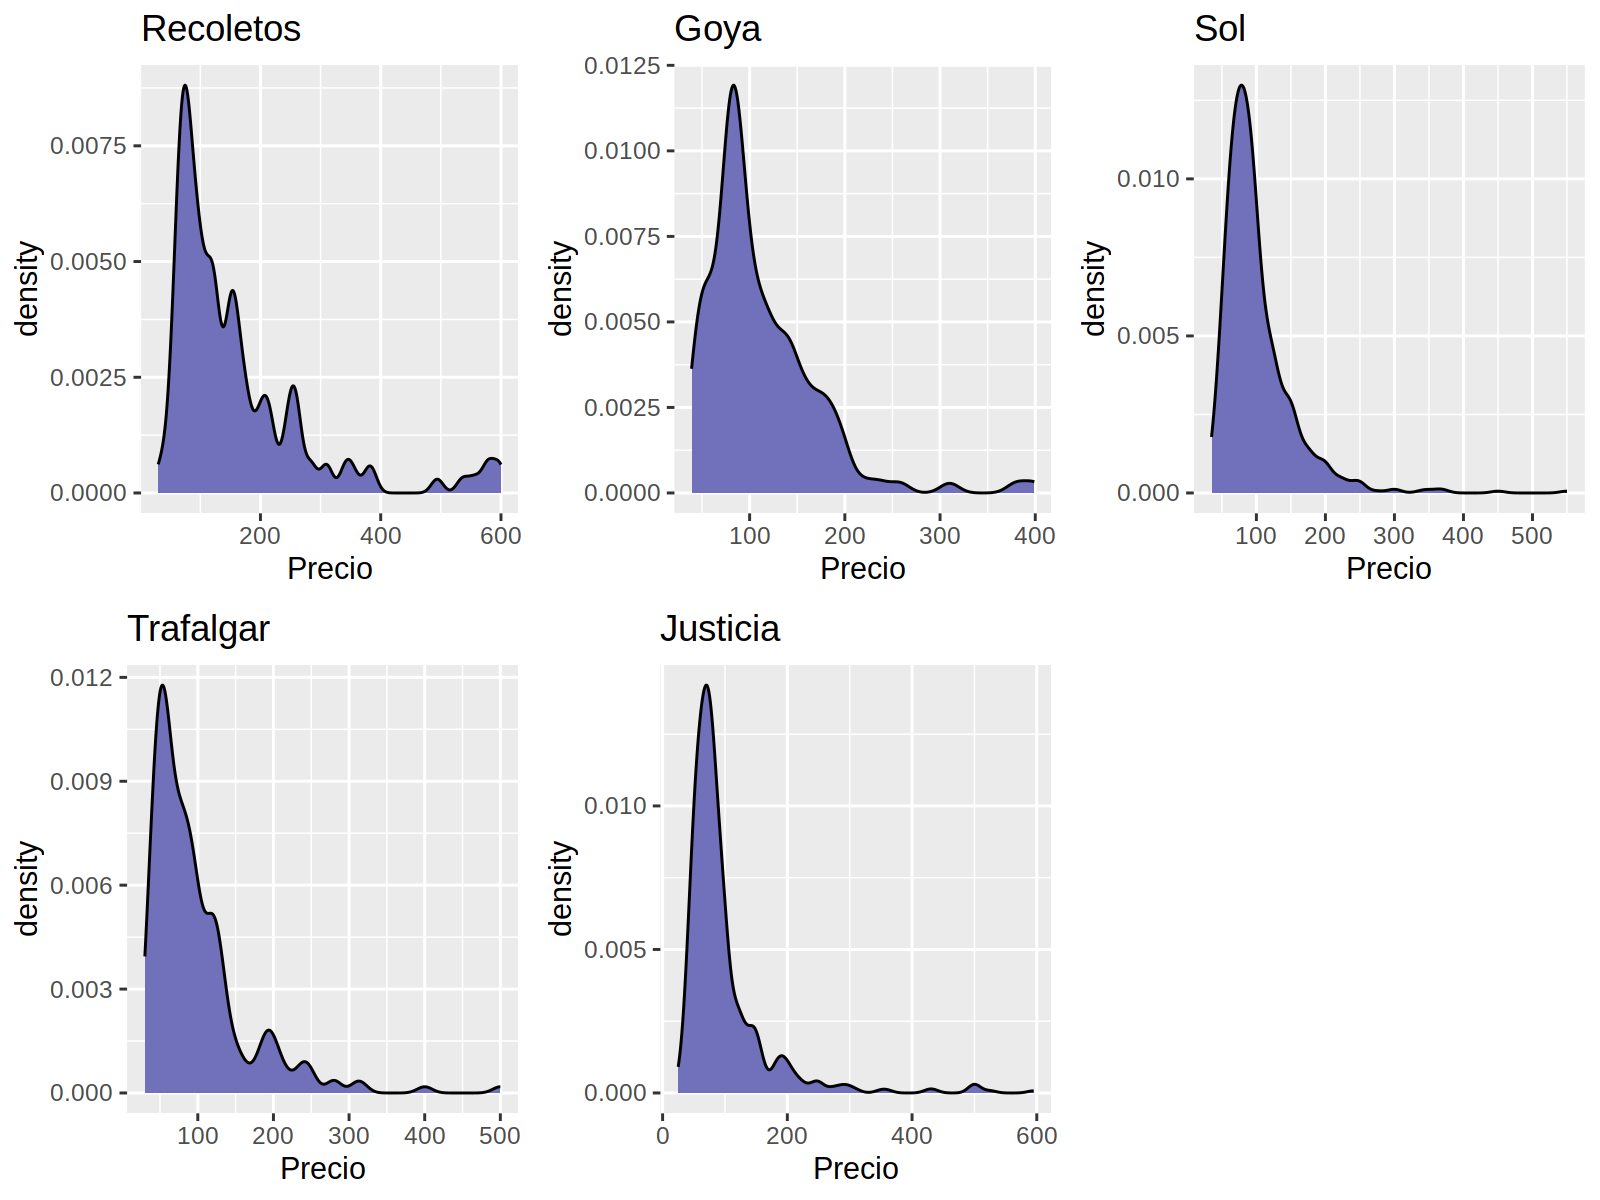

In [394]:
g1<-ggplot(airbnb_entire[airbnb_entire$Barrio == 'Recoletos',],aes(x=Precio))+ geom_density(fill="#7070BB",color="#010101", bw=10) + ggtitle("Recoletos")
g2<-ggplot(airbnb_entire[airbnb_entire$Barrio == 'Goya',],aes(x=Precio))+ geom_density(fill="#7070BB",color="#010101", bw=10) + ggtitle("Goya")
g3<-ggplot(airbnb_entire[airbnb_entire$Barrio == 'Sol',],aes(x=Precio))+ geom_density(fill="#7070BB",color="#010101", bw=10) + ggtitle("Sol")
g4<-ggplot(airbnb_entire[airbnb_entire$Barrio == 'Trafalgar',],aes(x=Precio))+ geom_density(fill="#7070BB",color="#010101", bw=10) + ggtitle("Trafalgar")
g5<-ggplot(airbnb_entire[airbnb_entire$Barrio == 'Justicia',],aes(x=Precio))+ geom_density(fill="#7070BB",color="#010101", bw=10) + ggtitle("Justicia")


grid.arrange(g1, g2, g3, g4, g5, nrow = 2)

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [395]:
meantamaño <- aggregate(airbnb_entire$metrosCuadrados, list(Barrio = airbnb_entire$Barrio),mean, na.rm=T)
colnames(meantamaño) <- c("Barrio", "meanMetros")
df_merged <- merge(df_5barrios, meantamaño, by = 'Barrio')
df_merged



Barrio,Mean,Count,meanMetros
<fct>,<dbl>,<int>,<dbl>
Goya,111.33803,142,51.68504
Justicia,98.25468,534,28.52669
Recoletos,161.92537,135,26.66316
Sol,100.75036,701,45.61692
Trafalgar,98.57848,223,29.30426


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 132 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 139 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 641 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 216 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 517 rows containing non-finite values (`stat_density()`).”


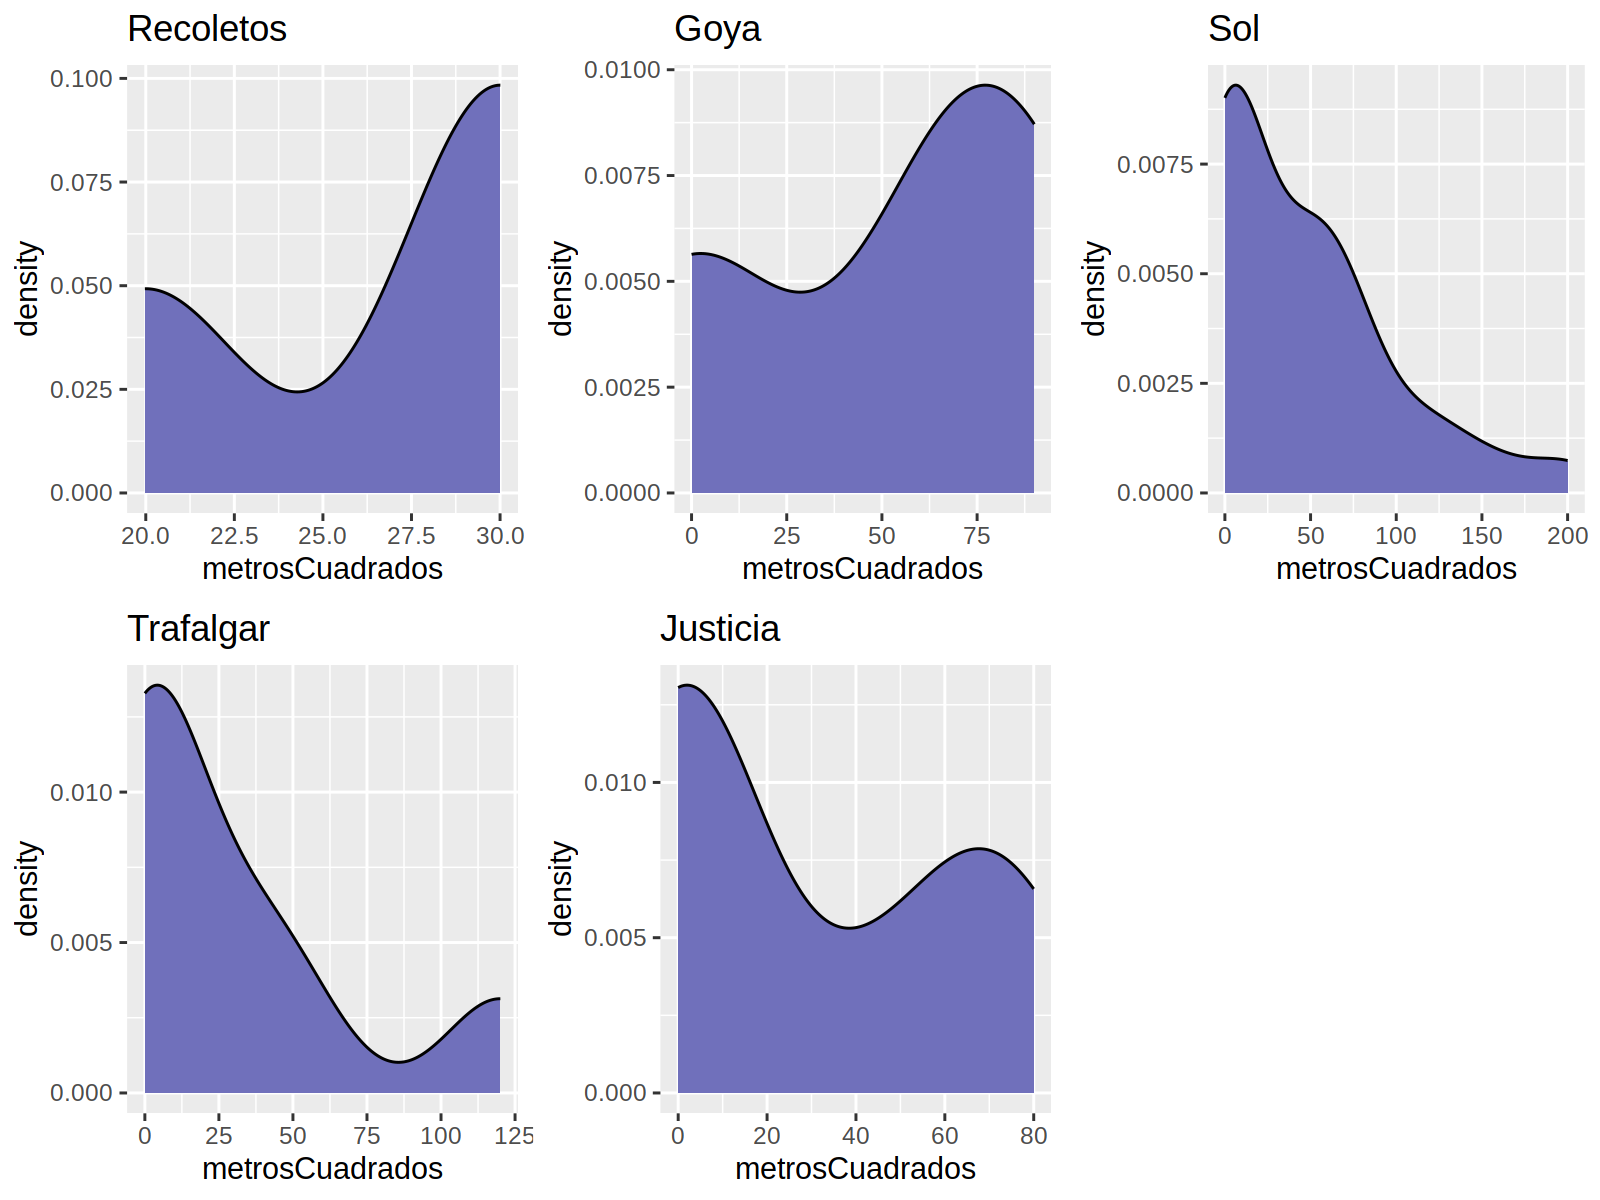

In [396]:
g1<-ggplot(airbnb_entire[airbnb_entire$Barrio == 'Recoletos',],aes(x=metrosCuadrados))+ geom_density(fill="#7070BB",color="#010101") + ggtitle("Recoletos")
g2<-ggplot(airbnb_entire[airbnb_entire$Barrio == 'Goya',],aes(x=metrosCuadrados))+ geom_density(fill="#7070BB",color="#010101") + ggtitle("Goya")
g3<-ggplot(airbnb_entire[airbnb_entire$Barrio == 'Sol',],aes(x=metrosCuadrados))+ geom_density(fill="#7070BB",color="#010101") + ggtitle("Sol")
g4<-ggplot(airbnb_entire[airbnb_entire$Barrio == 'Trafalgar',],aes(x=metrosCuadrados))+ geom_density(fill="#7070BB",color="#010101") + ggtitle("Trafalgar")
g5<-ggplot(airbnb_entire[airbnb_entire$Barrio == 'Justicia',],aes(x=metrosCuadrados))+ geom_density(fill="#7070BB",color="#010101") + ggtitle("Justicia")


grid.arrange(g1, g2, g3, g4, g5, nrow = 2)

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [397]:
top_barrios<-subset(airbnb_entire,Barrio %in% df_5barrios$Barrio)

In [398]:
for (barrio in unique(top_barrios$Barrio)){
    df<-top_barrios[which(top_barrios$Barrio==as.character(barrio)),]
    print(paste("Precio medio tipo",barrio," = ",mean(df$metrosCuadrados,na.rm=T)))
    if (nrow(df)>5000){
        df<-df[1:5000,]
    }
    sp<-shapiro.test(df$metrosCuadrados)
    print(paste(" - Test shapiro pvalor = ",sp$p.value))
}

kt<-kruskal.test(metrosCuadrados~Barrio,top_barrios)
kt
paste("No hay evidencias suficientes que determinen que en cada uno de esos barrios el tamaño de los apartamentos es diferente",
     "El pvalor del test es muy alto. pvalor=",kt$p.value)


[1] "Precio medio tipo Sol  =  45.6169213833333"
[1] " - Test shapiro pvalor =  8.6913775134728e-07"
[1] "Precio medio tipo Justicia  =  28.5266858823529"
[1] " - Test shapiro pvalor =  0.00064192630271212"
[1] "Precio medio tipo Recoletos  =  26.663161"
[1] " - Test shapiro pvalor =  0"
[1] "Precio medio tipo Goya  =  51.6850356666667"
[1] " - Test shapiro pvalor =  0.519924091564745"
[1] "Precio medio tipo Trafalgar  =  29.3042605714286"
[1] " - Test shapiro pvalor =  0.0127581397426826"



	Kruskal-Wallis rank sum test

data:  metrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 1.882, df = 4, p-value = 0.7574


[1] "No hay evidencias suficientes que determinen que en cada uno de esos barrios el tamaño de los apartamentos es diferente El pvalor del test es muy alto. pvalor= 0.757443581555649"

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [399]:
barrio_sol<-subset(airbnb_entire, Barrio=="Sol")
cr1<-cor(barrio_sol[,c("NumBanyos","NumDormitorios","MaxOcupantes","metrosCuadrados")],use="pairwise.complete.obs")
cr1

,NumBanyos,NumDormitorios,MaxOcupantes,metrosCuadrados
NumBanyos,1.0000000,0.6761906,0.6578162,0.4820549
NumDormitorios,0.6761906,1.0000000,0.7594598,0.5684521
MaxOcupantes,0.6578162,0.7594598,1.0000000,0.4286233
metrosCuadrados,0.4820549,0.5684521,0.4286233,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


Warning message:
“Removed 641 rows containing non-finite values (`stat_density()`).”


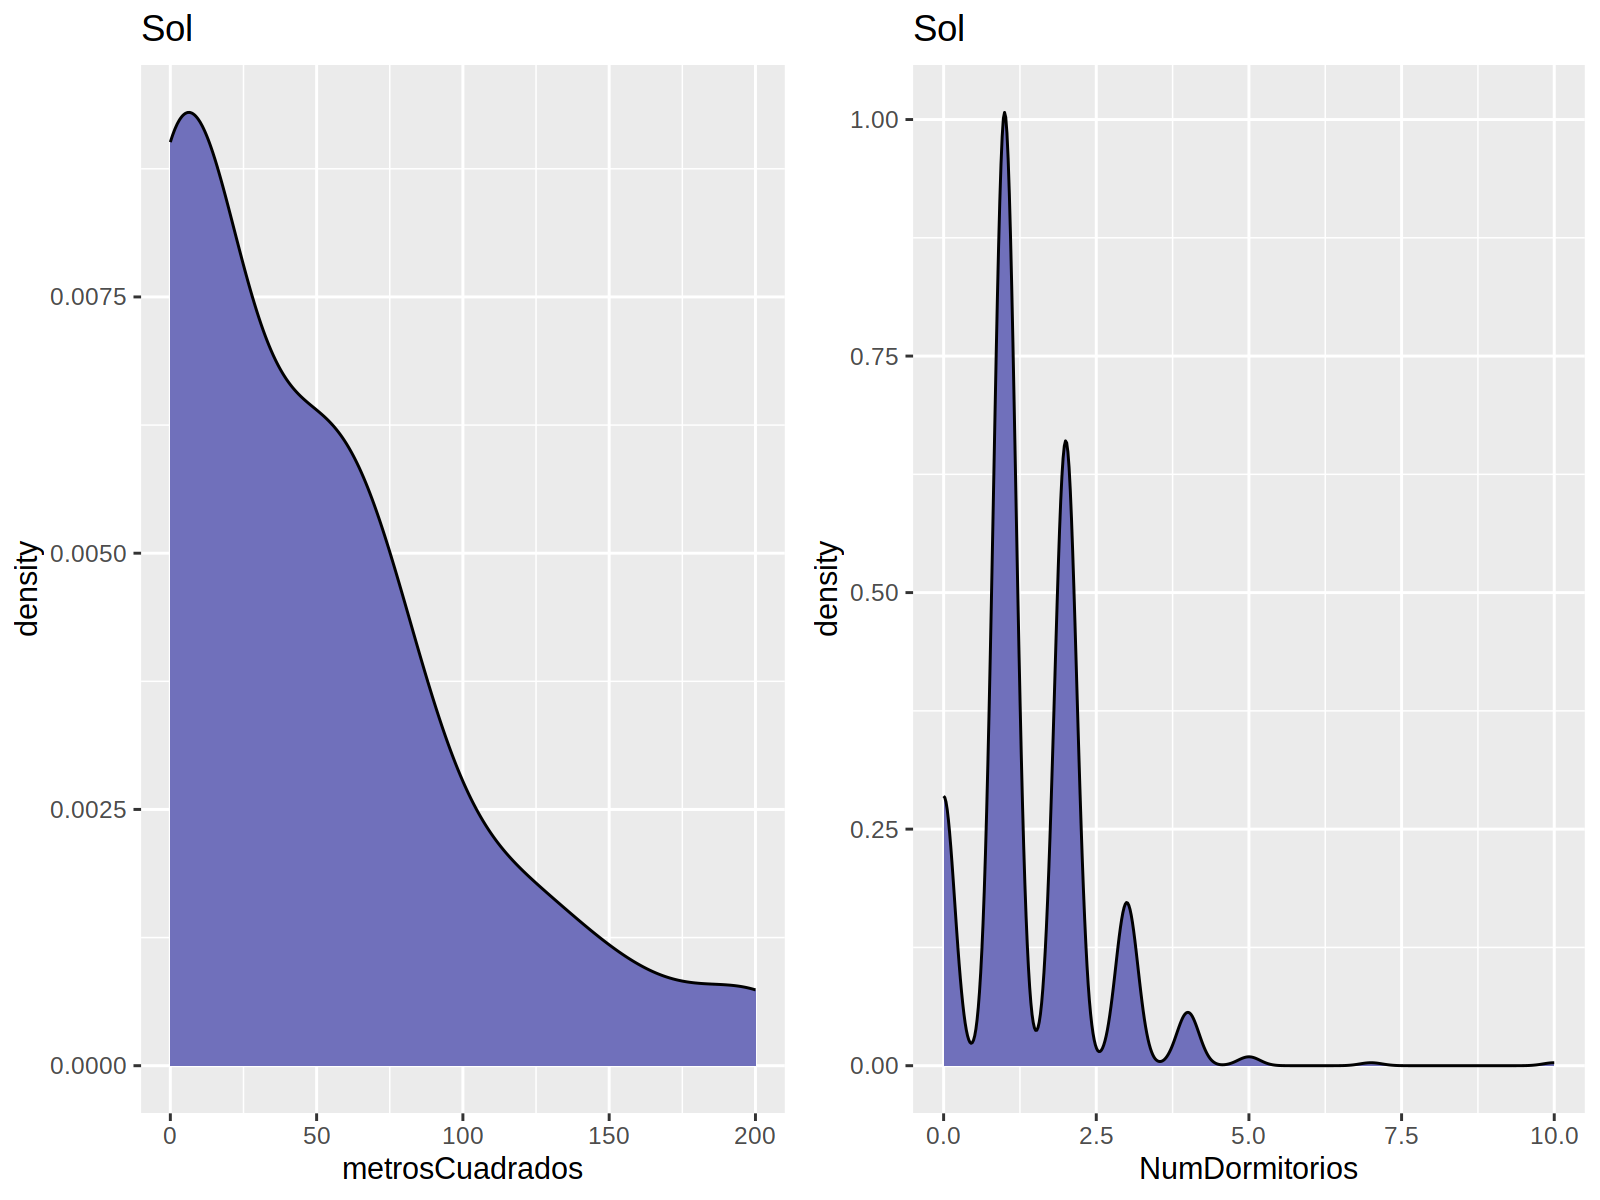

In [400]:
g1 <- ggplot(airbnb_entire[airbnb_entire$Barrio == 'Sol',],aes(x=metrosCuadrados))+ geom_density(fill="#7070BB",color="#010101") + ggtitle("Sol")
g2 <- ggplot(airbnb_entire[airbnb_entire$Barrio == 'Sol',],aes(x=NumDormitorios))+ geom_density(fill="#7070BB",color="#010101") + ggtitle("Sol")
grid.arrange(g1, g2, nrow = 1)

In [401]:
paste("filas: ", nrow(barrio_sol))
barrio_sol_limpio <- subset(barrio_sol, metrosCuadrados>25)
paste("filas df limpio: ", nrow(barrio_sol_limpio))

[1] "filas:  701"

[1] "filas df limpio:  32"

In [402]:
table(barrio_sol_limpio$NumDormitorios)


 0  1  2  3  4  5 
 4 14  7  3  2  2 

In [403]:
#barrio_sol_limpio
barrio_sol_limpio <- subset(barrio_sol_limpio, NumDormitorios > 0)
paste("filas df limpio: ", nrow(barrio_sol_limpio))

[1] "filas df limpio:  28"

In [404]:
cr1<-cor(barrio_sol_limpio[,c("NumBanyos","NumDormitorios","MaxOcupantes","metrosCuadrados")],use="pairwise.complete.obs")
cr1

,NumBanyos,NumDormitorios,MaxOcupantes,metrosCuadrados
NumBanyos,1.0000000,0.7215333,0.8633740,0.5739094
NumDormitorios,0.7215333,1.0000000,0.7716141,0.8136362
MaxOcupantes,0.8633740,0.7716141,1.0000000,0.6429358
metrosCuadrados,0.5739094,0.8136362,0.6429358,1.0000000


Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [405]:
model <- lm(data=barrio_sol_limpio, formula= Precio ~ NumBanyos+NumDormitorios+MaxOcupantes+metrosCuadrados )
summary(model)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    metrosCuadrados, data = barrio_sol_limpio)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.025 -15.795  -3.113  20.368  60.803 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      27.0884    17.1109   1.583  0.12705   
NumBanyos        -1.4140    16.9099  -0.084  0.93408   
NumDormitorios   33.5355    11.1118   3.018  0.00613 **
MaxOcupantes      2.2224     5.3512   0.415  0.68177   
metrosCuadrados   0.1669     0.2496   0.669  0.51046   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 34.53 on 23 degrees of freedom
Multiple R-squared:  0.7325,	Adjusted R-squared:  0.686 
F-statistic: 15.75 on 4 and 23 DF,  p-value: 2.445e-06


In [406]:
model <- lm(data=barrio_sol_limpio, formula= Precio ~ NumBanyos)
summary(model)


Call:
lm(formula = Precio ~ NumBanyos, data = barrio_sol_limpio)

Residuals:
    Min      1Q  Median      3Q     Max 
-93.202 -23.040  -5.893   6.710 157.004 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    44.58      19.91   2.239 0.033927 *  
NumBanyos      49.21      11.78   4.177 0.000294 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 48.57 on 26 degrees of freedom
Multiple R-squared:  0.4016,	Adjusted R-squared:  0.3786 
F-statistic: 17.45 on 1 and 26 DF,  p-value: 0.0002942


In [407]:
model <- lm(data=barrio_sol_limpio, formula= Precio ~ NumDormitorios )
summary(model)


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol_limpio)

Residuals:
    Min      1Q  Median      3Q     Max 
-95.543 -14.461  -3.322  21.678  55.457 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      36.766     11.689   3.145  0.00412 ** 
NumDormitorios   41.555      5.034   8.255 9.76e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.99 on 26 degrees of freedom
Multiple R-squared:  0.7239,	Adjusted R-squared:  0.7132 
F-statistic: 68.15 on 1 and 26 DF,  p-value: 9.762e-09


In [408]:
model <- lm(data=barrio_sol_limpio, formula= Precio ~ MaxOcupantes)
summary(model)


Call:
lm(formula = Precio ~ MaxOcupantes, data = barrio_sol_limpio)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.825 -20.104  -6.354  17.027 115.175 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    28.514     20.253   1.408    0.171    
MaxOcupantes   15.631      3.192   4.896 4.42e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.29 on 26 degrees of freedom
Multiple R-squared:  0.4797,	Adjusted R-squared:  0.4597 
F-statistic: 23.97 on 1 and 26 DF,  p-value: 4.417e-05


In [409]:
model <- lm(data=barrio_sol_limpio, formula= Precio ~ metrosCuadrados )
summary(model)


Call:
lm(formula = Precio ~ metrosCuadrados, data = barrio_sol_limpio)

Residuals:
    Min      1Q  Median      3Q     Max 
-66.190 -24.458  -2.172  13.180 120.970 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      31.0935    17.6751   1.759   0.0903 .  
metrosCuadrados   0.9860     0.1778   5.545 8.03e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.5 on 26 degrees of freedom
Multiple R-squared:  0.5418,	Adjusted R-squared:  0.5242 
F-statistic: 30.74 on 1 and 26 DF,  p-value: 8.032e-06


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [410]:
# NumDormitorio es la variable más fiable (mayor R cuadrado)

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [411]:
model<-lm(barrio_sol_limpio,formula=Precio ~ metrosCuadrados)
confint(model)["metrosCuadrados",]

2.5 %    97.5 % 
0.6204619 1.3515169

In [412]:
# Con una confianza del 95%, podemos decir que por cada metro cuadrado extra el precio del piso se incrementará entre 0.62 y 1.35 unidades monetarias
# el modelo para precio y MetrosCuadrados incrementa el precio del piso en 0.9860 por cada metro cuadrado adicional.

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [413]:
model<-lm(barrio_sol_limpio,formula=Precio ~ NumDormitorios)
confint(model)["NumDormitorios",]

2.5 %   97.5 % 
31.20842 51.90214

In [414]:
# Con una confianza del 95%, podemos decir que por cada habitación extra el precio del piso se incrementará entre 31.20 y 51.90 unidades monetarias
# el modelo para precio y NumHabitaciones incrementa el precio del piso en 41.555 por cada habitación adicional

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [415]:
probabilidad <- sum(barrio_sol_limpio$NumDormitorios==3)/ nrow(barrio_sol_limpio)
probabilidad

[1] 0.1071429

In [416]:
num <- nrow(subset(barrio_sol_limpio,NumDormitorios==3))
den <- nrow(barrio_sol_limpio)

prb <- dbinom(x=1, size= 1, prob= num/den)

paste("la probabilidad es: ", prb)

[1] "la probabilidad es:  0.107142857142857"

In [417]:
print("El margen de confianza es:")
binom.test(num,den)$conf

[1] "El margen de confianza es:"


[1] 0.02266509 0.28226440
attr(,"conf.level")
[1] 0.95